In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Step1: Generate a 20 * 2 matrix from a "Normal" (Gaussian) Distribution
arr1 = np.random.normal(size = (20,2))
arr1

array([[-0.50511734,  1.65425338],
       [-0.73997267,  0.7364387 ],
       [-0.45717639, -0.60233477],
       [-1.51963857, -0.33434872],
       [-0.46957842, -0.09239138],
       [-2.66502545,  0.78712987],
       [ 0.26231213, -0.58915312],
       [-2.34199424,  0.39122305],
       [ 0.58844855,  1.03934312],
       [-1.04225442,  1.39597191],
       [ 0.13463047, -0.90035774],
       [ 0.12567016, -0.19228564],
       [ 1.02902153, -0.50975455],
       [-0.01447448,  0.31082265],
       [-1.65630203, -0.12319356],
       [ 2.84631837,  0.08370885],
       [-1.58511024, -0.10562983],
       [ 0.19047477,  0.46695697],
       [ 0.77752588,  1.69899616],
       [-0.59446084,  0.50882107]])

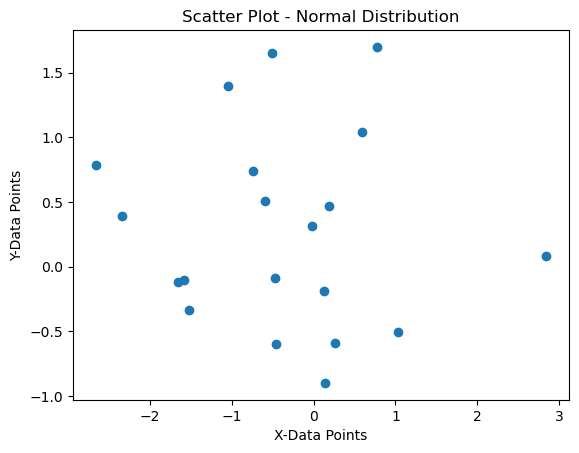

In [3]:
# Step2: Plot the data from step1 
x = arr1[:,0]
y = arr1[:,1]
plt.scatter(x,y)
plt.xlabel("X-Data Points")
plt.ylabel("Y-Data Points")
plt.title("Scatter Plot - Normal Distribution")
plt.show()

In [4]:
#Step3: Generate a (2 * 2) matrix from a "uniform" distribution such that values are between [0,1]
arr2 = np.random.uniform(0,1,size = (2,2))
arr2

array([[0.84015125, 0.95578413],
       [0.26271179, 0.68083462]])

In [5]:
#Step4: Multiply matrices from Step1 and Step3
datamat = np.matmul(arr1,arr2) #np.dot(arr1,arr2) Same Thing
datamat

array([[ 0.01021691,  0.64348984],
       [-0.42821784, -0.20586118],
       [-0.54233776, -0.8470523 ],
       [-1.36456359, -1.68008261],
       [-0.4187892 , -0.51171885],
       [-2.03223616, -2.01128377],
       [ 0.06560439, -0.15040207],
       [-1.86485048, -1.97208274],
       [ 0.76743348,  1.27005056],
       [-0.50891307, -0.04574423],
       [-0.12342464, -0.48431706],
       [ 0.05506623, -0.01080118],
       [ 0.73061519,  0.6364639 ],
       [ 0.06949603,  0.19778435],
       [-1.42390862, -1.66694163],
       [ 2.41332923,  2.77745781],
       [-1.35948255, -1.58693966],
       [ 0.28270272,  0.49997324],
       [ 1.09958567,  1.8998823 ],
       [-0.36576372, -0.22175323]])

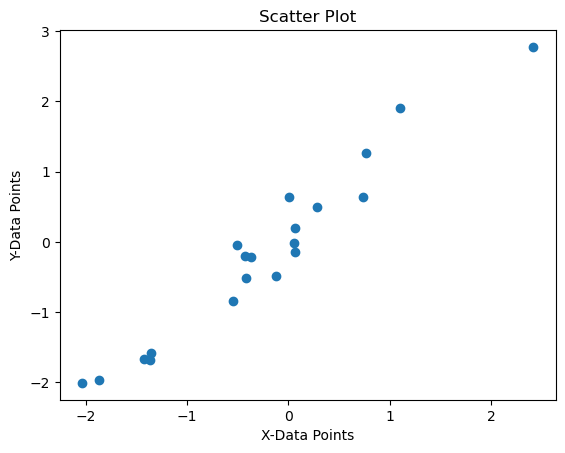

In [6]:
#Step5: Plot the data from Step4
x = datamat[:,0]
y = datamat[:,1]
plt.scatter(x,y)
plt.xlabel("X-Data Points")
plt.ylabel("Y-Data Points")
plt.title("Scatter Plot")
plt.show()

In [7]:
#Step6: Find the variance along the data axis and the direction perpendicular to it.
var_dataaxs = np.var(y)
var_perp_dataaxs = np.var(x)
print(var_dataaxs)
print(var_perp_dataaxs)


1.5413764950884747
1.0717534975088354


In [8]:
#Step7: Find Co-Variance Matrix
covar_mat = np.cov(datamat.T)
covar_mat

array([[1.12816158, 1.31793303],
       [1.31793303, 1.62250157]])

In [9]:
#Step8: Calculate Eigen Vectors And EigenValues of Covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covar_mat)
print(eigenvalues)
print(eigenvectors)

[0.03442125 2.7162419 ]
[[-0.76952258 -0.63861961]
 [ 0.63861961 -0.76952258]]


In [10]:
#Step9: Find Proportion of variance
tot = eigenvalues.sum()
p1 = eigenvalues[0] / tot
p2 = eigenvalues[1] / tot
print(p1*100)
print(p2*100)

1.2513801821672366
98.74861981783275


In [11]:
#Step10: Implement Y=PX where P is Row feature vector/Eigen vector with top row/column having main significant component (Here Column has) and X is the input data transposed
P = eigenvectors.copy()
P[:, [0, 1]] = P[:, [1, 0]]
print(P)
X = datamat.T
Y = np.matmul(P,X)

[[-0.63861961 -0.76952258]
 [-0.76952258  0.63861961]]


In [12]:
#Step11: Calculate Co-variance matrix Sy
cov_y = np.cov(Y)
cov_y
# Note: As you can see the diagonal vales are dominant and the non diagonal values are almost 0

array([[ 2.71624190e+00, -4.19072671e-17],
       [-4.19072671e-17,  3.44212535e-02]])

(2, 20)


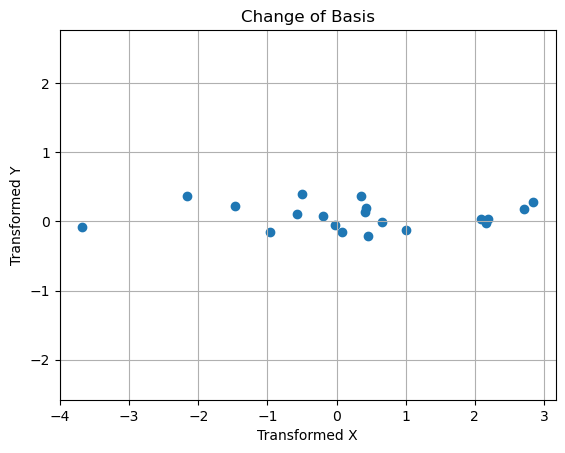

In [13]:
#Step12: Plotting the values using both eigen vectors
# Note: Y is the matrix with both eigen vectors multiplied
print(Y.shape)
plt.scatter(Y[0,:], Y[1,:])
plt.axis('equal')
plt.grid()
plt.xlabel("Transformed X")
plt.ylabel("Transformed Y")
plt.title("Change of Basis")
plt.show()


(2,)
(1, 2)


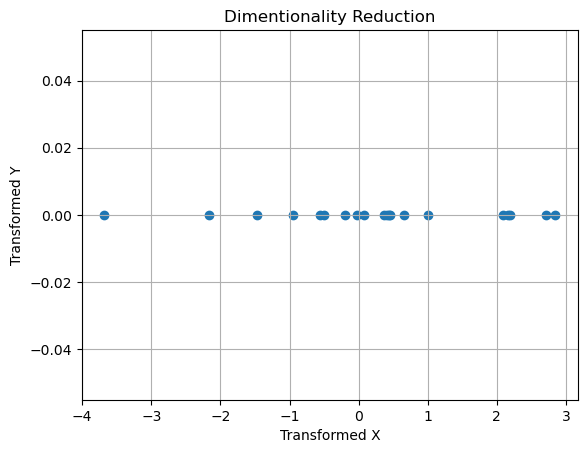

In [14]:
#Step13: Plotting the value using only one eigen vector i.e. Dimentionality reduction
eig_significant = P[:,0]
print(eig_significant.shape)
eig_significant = np.reshape(eig_significant, (1,2))
print(eig_significant.shape)

matrix_1d = np.matmul(eig_significant, X)
matrix_1d.shape
x_val = matrix_1d[0,:]
y_val = np.zeros_like(x_val)

plt.scatter(x_val,y_val)
plt.grid()
plt.xlabel("Transformed X")
plt.ylabel("Transformed Y")
plt.title("Dimentionality Reduction")
plt.show()
